# Imports

In [1]:
# imports
import numpy as np
import torch
from tueplots import bundles, figsizes
import wandb
import matplotlib.pyplot as plt

import sys

%load_ext autoreload
%autoreload 2

sys.path.insert(0, '.')

In [2]:
from analysis import sweep2df, RED, BLUE, plot_typography


In [3]:
USETEX = True

In [4]:
plt.rcParams.update(bundles.neurips2022(usetex=USETEX))
plt.rcParams.update({
    'text.latex.preamble': [r'\usepackage{amsfonts}', # mathbb
                            r'\usepackage{amsmath}'] # boldsymbol
})

In [5]:
plot_typography(usetex=USETEX, small=12, medium=16, big=20)

In [6]:
# Constants
ENTITY = "causal-representation-learning"
PROJECT = "sam_test"

# W&B API
api = wandb.Api(timeout=200)
runs = api.runs(ENTITY + "/" + PROJECT)

# Data loading

In [20]:
SWEEP_ID = "qqqqlma7"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"sam_vae_{SWEEP_ID}"
df_sam_vae, sam_val_loss, sam_val_scale_inv = sweep2df(sweep.runs, filename, save=True, load=False)

In [59]:
SWEEP_ID = "4aggfh82"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"fix_enc_var_sweep_{SWEEP_ID}"
df_fix_enc_var, fix_enc_val_loss, fix_enc_val_scale_inv = sweep2df(sweep.runs, filename, save=True, load=False)

In [7]:
SWEEP_ID = "1agmyttm"
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")
filename = f"rae_sweep_{SWEEP_ID}"
df_rae, rae_val_loss, rae_val_scale_inv = sweep2df(sweep.runs, filename, save=True, load=False)

In [61]:
fix_enc_val_loss

array([[0.76648802, 0.73948586, 0.72713304, ..., 0.68286419, 0.68212074,
        0.68191904],
       [0.75842756, 0.73492914, 0.72732908, ..., 0.68296397, 0.68312317,
        0.68252826],
       [0.76381749, 0.73500246, 0.72405642, ..., 0.68311024, 0.68343514,
        0.68215197],
       ...,
       [0.19330496, 0.13383311, 0.11109475, ..., 0.06226055, 0.06177073,
        0.06157282],
       [0.25670078, 0.17908594, 0.13794474, ..., 0.06156644, 0.06100206,
        0.06076358],
       [0.1877277 , 0.12960823, 0.10658313, ..., 0.07026017, 0.07035043,
        0.07017394]])

In [57]:
fix_enc_val_loss

0     0.187728
1     0.129608
2     0.106583
3     0.103090
4     0.092366
5     0.095847
6     0.093809
7     0.084940
8     0.086025
9     0.082487
10    0.083837
11    0.079683
12    0.077792
13    0.078564
14    0.076829
15    0.076596
16    0.075760
17    0.074610
18    0.075449
19    0.074024
20    0.074527
21    0.073422
22    0.073506
23    0.072638
24    0.072348
25    0.071471
26    0.071646
27    0.071547
28    0.070539
29    0.071094
30    0.070260
31    0.070350
32    0.070174
Name: val_loss, dtype: float64

In [62]:
fix_enc_val_loss[list(df_fix_enc_var.enc_var == 1.), :]

array([[0.5195834 , 0.33505678, 0.22495827, 0.17100453, 0.14097531,
        0.12307622, 0.11137843, 0.10178896, 0.09543912, 0.09062926,
        0.08774997, 0.08550373, 0.08403856, 0.08255449, 0.08136884,
        0.0807066 , 0.07970152, 0.07888332, 0.07806002, 0.07754984,
        0.07705115, 0.07645506, 0.07603373, 0.07583456, 0.07529028,
        0.07470416, 0.07442699, 0.0743462 , 0.07388487, 0.07368508,
        0.07330088, 0.07312802, 0.07243644],
       [0.44972149, 0.22359897, 0.14691706, 0.12188341, 0.11762333,
        0.10831483, 0.09935219, 0.0973874 , 0.09597278, 0.09414917,
        0.08882719, 0.09083716, 0.08696818, 0.08532995, 0.08447703,
        0.08443233, 0.08155883, 0.08154073, 0.07997619, 0.08568978,
        0.07853197, 0.07724743, 0.07579076, 0.07487733, 0.07559399,
        0.07235311, 0.07211468, 0.07125414, 0.06954409, 0.06975511,
        0.06885637, 0.06905586, 0.06706037],
       [0.54182708, 0.32934967, 0.21445361, 0.17359322, 0.14690381,
        0.12460647, 0.1126

In [77]:
df_fix_enc_var.enc_var.unique()

array([1.e-06, 1.e-04, 1.e-02, 1.e+00])

# Pre-processing


In [74]:
enc_vars = df_fix_enc_var.enc_var.unique()
scale_enc_var = {var: fix_enc_val_scale_inv[df_fix_enc_var.enc_var == var] for var in enc_vars}
loss_enc_var = {var: fix_enc_val_loss[df_fix_enc_var.enc_var == var] for var in enc_vars}

# Plots

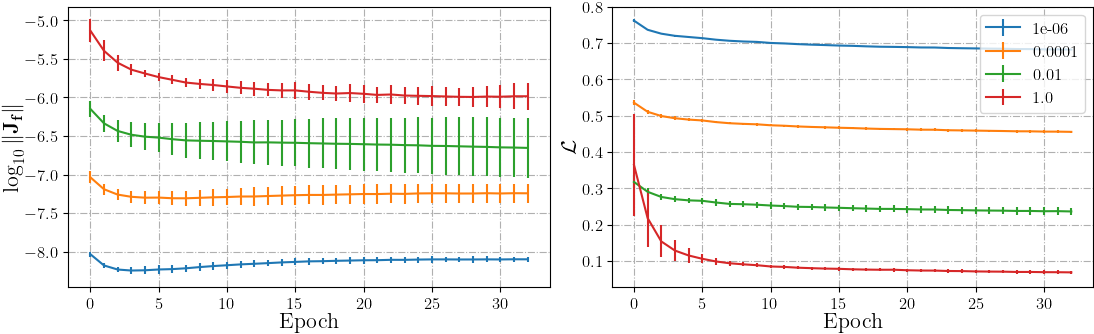

In [95]:
LABELPAD = 1
TICK_PADDING = 2
COLORS = ["tab:blue","tab:orange","tab:green","tab:red"]

fig = plt.figure(figsize=figsizes.neurips2022(nrows=1, ncols=2, rel_width=2)['figure.figsize'])

"""Loss and inv scale"""
ax = fig.add_subplot(121)
ax.grid(True, which="both", ls="-.")



for (var, inv_scale), color in zip(scale_enc_var.items(), COLORS):
    ax.errorbar(range(len(inv_scale[0])), np.log10(inv_scale).mean(0), np.log10(inv_scale).std(0), c=color, label=str(var))

ax.set_xlabel("Epoch", labelpad=LABELPAD)
ax.set_ylabel("$\log_{10}\Vert\mathrm{\mathbf{J}}_{\mathbf{f}}\Vert$", labelpad=LABELPAD)

ax = fig.add_subplot(122)
ax.grid(True, which="both", ls="-.")

for (var, loss), color in zip(loss_enc_var.items(), COLORS):
    ax.errorbar(range(len(loss[0])), loss.mean(0), loss.std(0), c=color, label=str(var))

ax.set_xlabel("Epoch", labelpad=LABELPAD)
ax.set_ylabel("$\mathcal{L}$", labelpad=LABELPAD)

"""todo: fix xlabels (I can save the step in analysis.py from the histories and use it as labels here"""



# val_epoch_factor = 25
# ax.set_xticklabels(range(0, min_len * val_epoch_factor, val_epoch_factor))
# ax.grid(True, which="both", ls="-.")

plt.legend(loc="upper right")

# plt.savefig("dsprites_mcc_cima.svg")